In [1]:
import GIS_Tools as gis
import numpy as np
#- Importing the GIS_Tools script and numpy

In [2]:
dataset = np.loadtxt('HelsinkiData.txt',dtype=str,delimiter=';',usecols=(5,6,7,8),unpack=True)
#- loading the 5th-8th columns of data (x and y coordinates for the starting and ending points)

In [3]:
dataset

array([['from_x', '24.9704379', '24.9704379', ..., '24.9704379',
        '24.9704379', '24.9704379'],
       ['from_y', '60.3119173', '60.3119173', ..., '60.3119173',
        '60.3119173', '60.3119173'],
       ['to_x', '24.8560344', '24.8605682', ..., '24.5553668',
        '24.5598683', '24.5555336'],
       ['to_y', '60.399940599999994', '60.4000135', ..., '60.1724281',
        '60.1725111', '60.170185399999994']], dtype='<U18')

In [4]:
def createLines(data):
    ''' This function takes raw data of coordinates (x and y) for starting and ending
        points and transforms them into an array of lines. The data argument in the
        function needs to be a list of four things: data[0] = starting_X, data[1] =
        starting_Y, data[2] = ending_X, and data[3] = ending_Y.'''
    
    orig_pointsTemp = []
    dest_pointsTemp = []
    for row in range(1,len(data[0])):
        orig_pointsTemp.append([data[0][row],data[1][row]])
        dest_pointsTemp.append([data[2][row],data[3][row]])
    #- This initializes the starting and ending point tempory arrays for memory.
    #- The for loop iterates through the arrays of the two points and places each
    #- row into the memory-objects as their own array (e.g. orig_pointsTemp becomes
    #- a list of lists).
        
    orig_points = []
    dest_points = []
    for point in orig_pointsTemp:
        orig_points.append(gis.createPointGeom(float(point[0]),float(point[1])))
    for point in dest_pointsTemp:
        dest_points.append(gis.createPointGeom(float(point[0]),float(point[1])))
    #- These loops iterate through the temporary memory arrays, takes each set of
    #- coordinates, and creates a geographic Point object out of each - which is 
    #- then appended into a new list.
        
    lines = []    
    for i in range(len(data[0])-1):
        lines.append(gis.createLineGeom([orig_points[i],dest_points[i]]))
    #- This loop iterates through the two arrays of Point objects and turns them
    #- into a Line object.

    distances = []
    for line in lines:
        distances.append(gis.getLength(line))
    #- This creates an array of Line object lengths.
    
    print("The average distance between two points on each line is: ", np.mean(distances))
        
    return lines

The average distance between two points on each line is:  0.21502224823227248


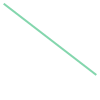

In [5]:
createLines(dataset)[0]